In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import matplotlib.colors as mcolors


# Testing Randomness

Code Ran: python /Users/marcusbluestone/Documents/GitHub/automatic_vehicular_control3/ring_single_veh_number.py $F/pareto/single_ring/random_test n_veh=15  av=0 seed_np=False seed_torch=False n_steps=15

Things Tried:
1. Set np_seed equal to some seed --> no effect
2. Set torch_seed equal to some seed --> no effect (no training)
3. Changed random to False in line 460 --> fixes things [on its own]!!
- https://sumo.dlr.de/docs/sumo.html (Initialises the random number generator with the current system time; default: false)

(15, 1001)


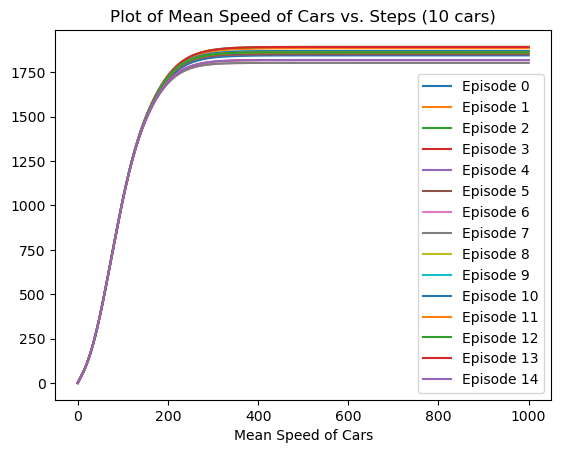

In [43]:
number_vehicles_used = 10
mean_speed_eps = np.load(f'../automatic_vehicular_control/pareto/single_ring/random_test/veh_{number_vehicles_used}/flow_eps.npy')
#list of mean_speed (n_steps x horizon)

print(mean_speed_eps.shape) 
for i in range(mean_speed_eps.shape[0]):
    plt.plot(mean_speed_eps[i, :], label=f"Episode {i}")

plt.legend()
plt.title(f"Plot of Mean Speed of Cars vs. Steps ({number_vehicles_used} cars)")
plt.xlabel("Step #")
plt.xlabel("Mean Speed of Cars")



plt.show()

# Xiaoyi's Stuff

In [ ]:
base_path =  "../pareto/av_1_c_200/beta_0-2/"
speed_ls = []
# veh_num_array = [i for i in range(14, 26, 2)]
# veh_num_array = [2, 6, 8, 10, 12, 14, 16, 18, 20, 22]
veh_num_array = [i for i in range(2, 26, 2)]
for veh_num in veh_num_array:
    # print(veh_num)
    speed = np.mean(pd.read_csv(base_path + f"veh_{str(veh_num)}/train_results.csv")["speed"][-10:])
    speed_ls.append(speed)
speed_ls

density_0 = np.array(veh_num_array) / (200 * 1e-3)
flow_0 = np.array(density_0 * np.array(speed_ls))
plt.plot(density_0, flow_0, marker='o', label="Beta 0")


FileNotFoundError: [Errno 2] No such file or directory: '../pareto/av_1_c_200/beta_0-2/veh_2/train_results.csv'

In [35]:
pd.read_csv(base_path + f"veh_{str(4)}/train_results.csv")

,step,klcoef,lr,rollout_time,horizon,speed,speed_rl,speed_rl_std,speed_human,collisions,...,raw_ttc_std,raw_drac_mean,raw_drac_std,ret_mean,rollout_end_time,policy_loss,kl,entropy,gd_time,total_time
0,0,2.000000e-01,0.0001,5.77993,1000,11.7655,11.6215,0.394350,11.8375,0,...,21342.1,0.002609,0.003641,-14.662400,0.006602,14.533600,0.000559,1.43497,3.44192,19.0251
1,1,1.000000e-01,0.0001,3.07733,1000,13.4877,13.3903,0.337585,13.5364,0,...,191253.0,0.001269,0.002143,0.143332,0.006571,-0.142549,0.000188,1.46578,3.68138,29.1826
2,2,5.000000e-02,0.0001,3.00467,1000,11.6929,11.6361,0.307660,11.7213,0,...,20910.8,0.001997,0.004242,-5.417690,0.006713,5.377630,0.000412,1.48043,3.68371,38.9684
3,3,2.500000e-02,0.0001,3.21487,1000,10.3166,10.3183,0.253247,10.3158,0,...,19917.0,0.000236,0.000332,-90.021100,0.006606,86.482900,0.008030,1.56482,3.57828,48.7993
4,4,3.750000e-02,0.0001,3.24901,1000,11.5221,11.5211,0.204640,11.5226,0,...,38259.9,0.001198,0.002540,0.311088,0.006625,-0.301520,0.002855,1.69599,3.48257,59.2806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,1.451710e-57,0.0001,3.15735,1000,12.4362,12.3651,0.159065,12.4718,0,...,16700.4,0.000880,0.001109,0.066762,0.006964,-0.067357,0.000135,2.33665,3.87653,2104.2300
197,197,7.258530e-58,0.0001,3.02949,1000,11.7775,11.6452,0.158586,11.8436,0,...,522395.0,0.000490,0.000872,0.066584,0.006823,-0.067153,0.000126,2.31205,3.88105,2114.7600
198,198,3.629260e-58,0.0001,3.17311,1000,11.9552,11.9541,0.164115,11.9558,0,...,29992.9,0.000316,0.000633,0.066405,0.006997,-0.066959,0.000121,2.28937,3.81708,2125.6500
199,199,1.814630e-58,0.0001,3.12619,1000,12.3256,12.3148,0.161027,12.3310,0,...,27562.7,0.000685,0.001508,0.066227,0.006754,-0.066772,0.000119,2.27111,3.90071,2136.0500


In [36]:
speed_ls

[13.551149999999998,
 11.669139999999999,
 11.85083,
 11.6905,
 10.619384,
 9.450116,
 7.905808,
 6.288613,
 4.666417999999999,
 2.644545,
 2.25034,
 1.552934]

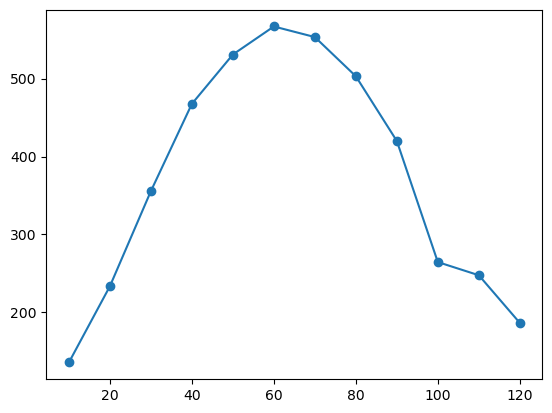

In [68]:
base_path =  "../pareto/av_1_c_200/beta_0-2/"
speed_ls = []
veh_num_array = [i for i in range(2, 26, 2)]

for veh_num in veh_num_array:
    # print(veh_num)
    speed = np.mean(pd.read_csv(base_path + f"veh_{str(veh_num)}/train_results.csv")["speed"][-10:])
    speed_ls.append(speed)
speed_ls

density_1 = np.array(veh_num_array) / (200 * 1e-3)
flow_1 = np.array(density_1 * np.array(speed_ls))
plt.plot(density_1, flow_1, marker='o', label="Beta 0.5")


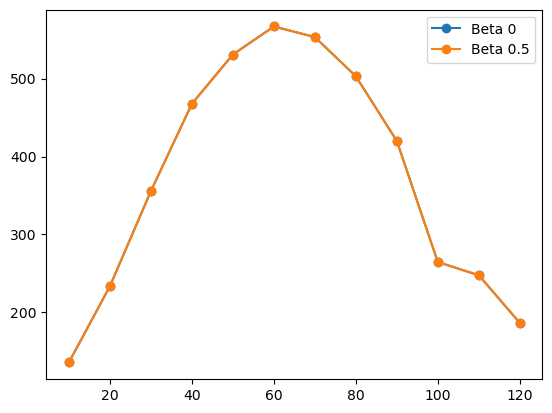

In [69]:
plt.plot(density_0, flow_0, marker='o', label="Beta 0 ")
plt.plot(density_1, flow_1, marker='o', label="Beta 0.5")
plt.legend()

In [70]:
# Load data for vehicle flows
# Load data for vehicle flows
base_path =  "../pareto/av_1_c_200/beta_0-2/"

veh_num_array = [i for i in range(2, 26, 2)]
# veh_num_array = [2, 6, 8, 10, 12, 14, 16, 20, 22]
loaded_data = {
    veh_num: np.load(base_path + f"veh_{str(veh_num)}/mean_dict.npz", allow_pickle=True)
    for veh_num in veh_num_array
}
# # Convert back to a standard dictionary if needed
# mean_dict_loaded = {key: loaded_data[4][key].item() for key in loaded_data[4]}
# mean_dict_loaded

veh_colors = ((0.1, 0.1, 0.6), (0.7, 0.7, 0.9))

In [71]:
# base_path =  "../pareto/av_1_c_200/beta_0-2/"

# np.load(base_path + f"veh_{str(4)}/mean_dict.npz", allow_pickle=True)

In [72]:
color_start=(0.7, 0.7, 0.9)
color_end=(0.1, 0.1, 0.6)

# Define color fader function for gradient color
def colorFader(c1, c2, mix=0):
    """ Linear interpolation between two colors `c1` and `c2` """
    return tuple(c1[i] * (1 - mix) + c2[i] * mix for i in range(3))



In [73]:
mean_dict_loaded ={key: loaded_data[16][key].item() for key in loaded_data[veh_num_array[0]]}
len(mean_dict_loaded["0"]["reward"])

201

In [74]:
mean_dict_loaded["0"]["reward"][1].shape

(2000,)

In [75]:

# Initialize the plotting function
def plot_mean_rewards(loaded_data, y_label):
    # Set up the 2x3 grid for the plots
    fig, axes = plt.subplots(int(len(veh_num_array)/3), 3, figsize=(15, 10/2 *len(veh_num_array)/3))
 
    # Iterate through each veh_num, extracting reward and speed, and plotting
    for idx, veh_num in enumerate(veh_num_array):
        row, col = divmod(idx, 3)
        
        # Load the mean_dict for each veh_num and get reward and speed
        mean_dict_loaded ={key: loaded_data[veh_num][key].item() for key in loaded_data[veh_num_array[0]]}
        mean_rewards = mean_dict_loaded["0"][y_label]
        n = len(mean_rewards)
        for i in range(n):
            color = colorFader(color_start, color_end, i / n)
            axes[row, col].plot(mean_rewards[i], color=color, alpha=0.7)   
            axes[row, col].set_title(f"Veh {veh_num}")
            axes[row, col].set_xlabel("Episode")
            axes[row, col].set_ylabel(y_label)


plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

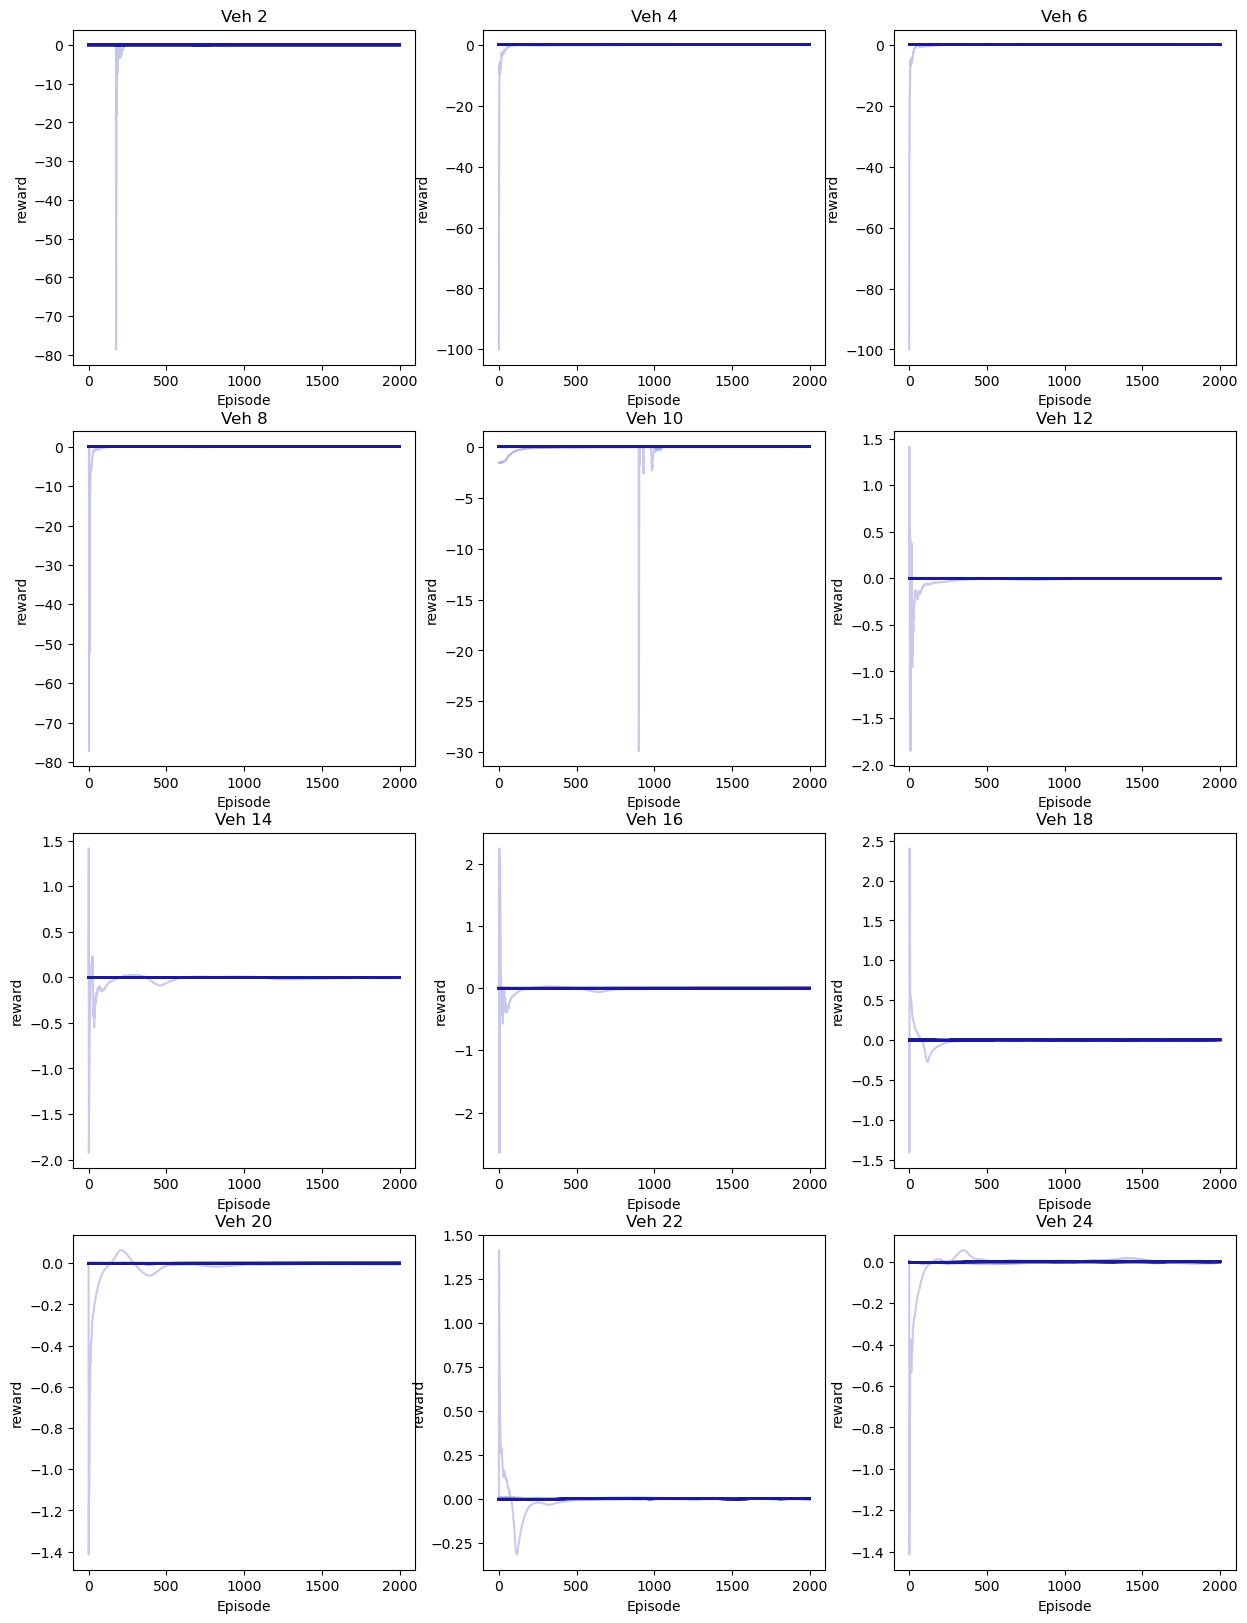

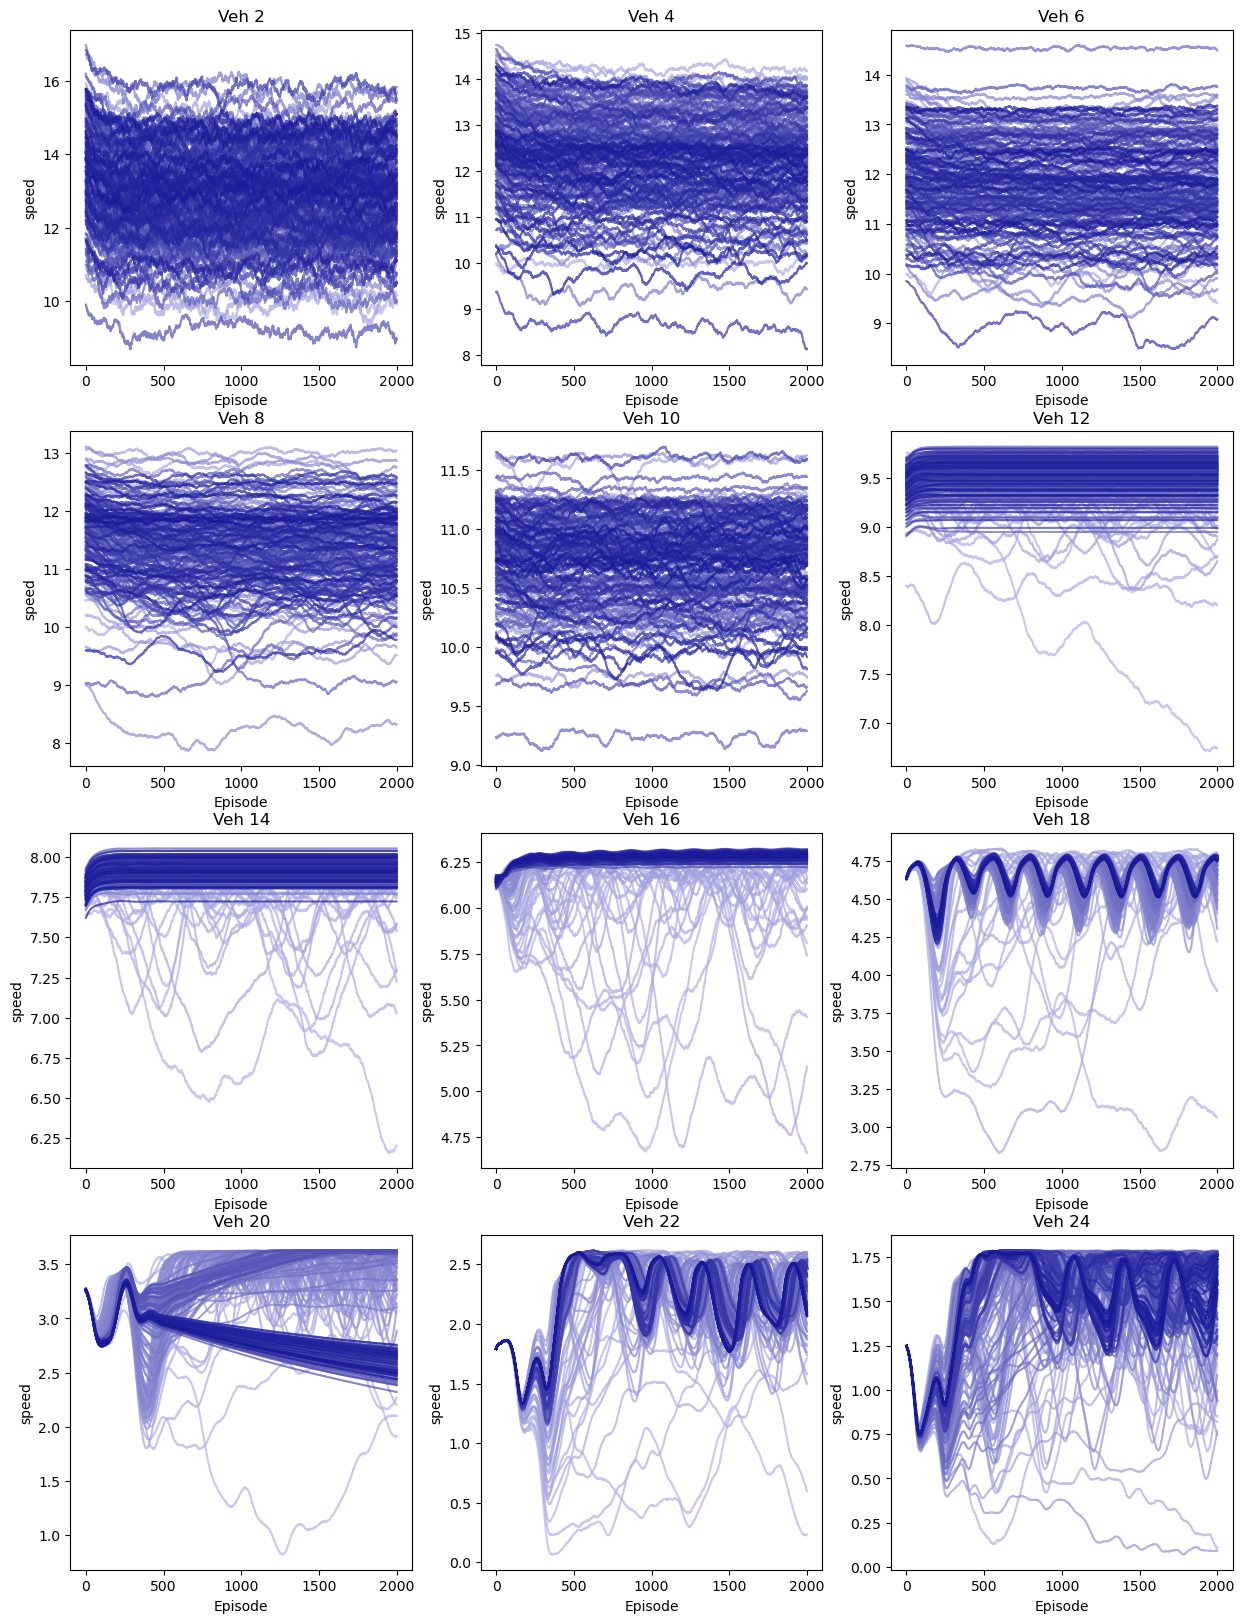

In [76]:
plot_mean_rewards(loaded_data, y_label = "reward")
plot_mean_rewards(loaded_data, y_label = "speed")


In [81]:
speed_ls = []
for veh in veh_num_array:
    mean_dict_loaded ={key: loaded_data[veh][key].item() for key in loaded_data[veh_num_array[0]]}
    speed = np.mean(mean_dict_loaded["0"]["speed"][-1][-10:])
    speed_ls.append(speed)
speed_ls


[12.671902678539668,
 10.150395009548955,
 12.440023981184003,
 11.796614082176436,
 10.566405154751543,
 9.470040584984789,
 7.813454255339037,
 6.28762791243931,
 4.7600298802165195,
 2.521066053060344,
 2.1073764738158034,
 1.6381653001942804]

In [82]:
density = np.array(veh_num_array) / (200 * 1e-3)
density

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120.])

In [83]:
flow = np.array(density * np.array(speed_ls))
flow

array([126.71902679, 203.00790019, 373.20071944, 471.86456329,
       528.32025774, 568.2024351 , 546.94179787, 503.010233  ,
       428.40268922, 252.10660531, 231.81141212, 196.57983602])

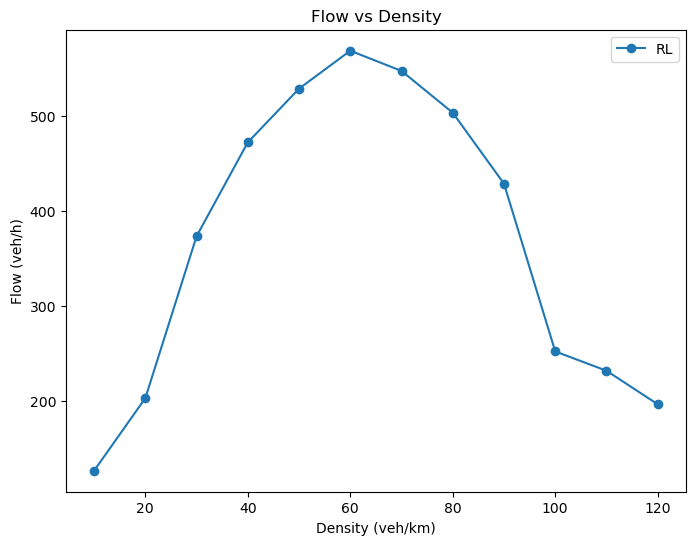

In [84]:
# Plotting Flow vs Density
fig, ax = plt.subplots(figsize=(8, 6))
density_1 = np.array(veh_num_array) / (200 * 1e-3)
flow_1 = np.array(density_1 * np.array(speed_ls))
plt.plot(density_1, flow_1, marker='o', label="RL")

plt.ylabel("Flow (veh/h)", fontsize=10)
plt.xlabel("Density (veh/km)", fontsize=10)
plt.title("Flow vs Density")
plt.legend(loc="upper right")
plt.show()

In [50]:
veh_num = "6"
base_path = "../pareto/av_1_c_250/beta_0/veh_"+str(veh_num)+"/"

loaded_data = np.load(base_path+"mean_dict.npz", allow_pickle=True)

# Convert back to a standard dictionary if needed
mean_dict_loaded = {key: loaded_data[key].item() for key in loaded_data}
mean_dict_loaded

{'0': {'reward': [array([0.        , 1.41420357, 1.30938611, ..., 0.00210637, 0.00210456,
          0.00210275])],
  'speed': [array([ 0.        ,  0.03964715,  0.0796783 , ..., 12.87949149,
          12.8793396 , 12.87918723])]},
 '1': {'reward': [array([0.        , 1.41420354, 1.31142885, ..., 0.00210788, 0.00210606,
          0.00210425])],
  'speed': [array([ 0.        ,  0.03970578,  0.07961525, ..., 12.88116867,
          12.88102221, 12.88087516])]},
 '2': {'reward': [array([0.        , 1.41420356, 1.31038387, ..., 0.00210378, 0.00210198,
          0.00210017])],
  'speed': [array([ 0.        ,  0.0394676 ,  0.07947005, ..., 12.88042975,
          12.8802808 , 12.8801313 ])]},
 '3': {'reward': [array([0.        , 1.41420357, 1.31061927, ..., 0.00211297, 0.00211114,
          0.00210932])],
  'speed': [array([ 0.        ,  0.03997396,  0.08000075, ..., 12.88133347,
          12.88118842, 12.88104276])]},
 '4': {'reward': [array([0.        , 1.4142036 , 1.31049728, ..., 0.0021054 

In [51]:
len(mean_dict_loaded["0"]["reward"])


# Define color fader function for gradient color
def colorFader(c1, c2, mix=0):
    """ Linear interpolation between two colors `c1` and `c2` """
    return tuple(c1[i] * (1 - mix) + c2[i] * mix for i in range(3))



In [52]:


# Define color fader function for gradient color
def colorFader(c1, c2, mix=0):
    c1 = mcolors.to_rgb(c1)
    c2 = mcolors.to_rgb(c2)

    """ Linear interpolation between two colors `c1` and `c2` """
    return tuple(c1[i] * (1 - mix) + c2[i] * mix for i in range(3))



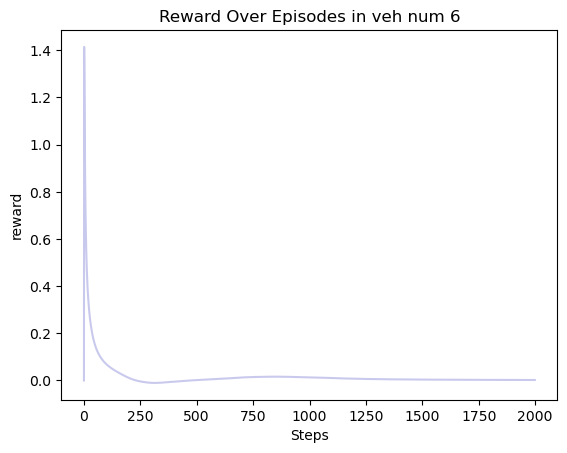

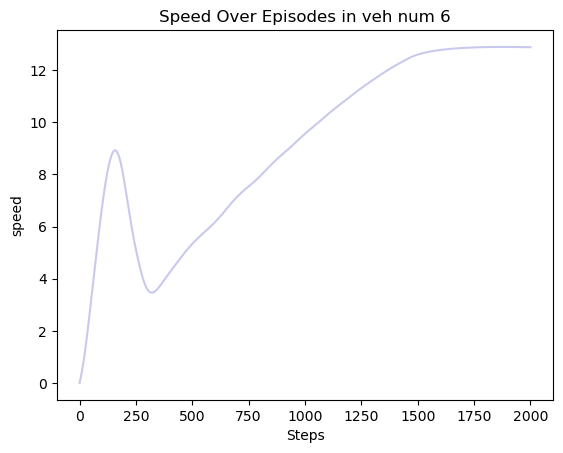

In [53]:

def plot_mean_rewards(mean_rewards, env, y_label, color_start=(0.7, 0.7, 0.9), color_end=(0.1, 0.1, 0.6), ):
    """
    Plot mean rewards over steps across episodes with a gradient color scheme.
    
    Parameters:
    - mean_rewards: 2D array (episodes x steps) of mean rewards to plot.
    - env: environment identifier to include in the plot title.
    - color_start: RGB tuple for the start of the gradient color.
    - color_end: RGB tuple for the end of the gradient color.
    """

    n = len(mean_rewards)
    
    # Plot each episode with a gradient of colors from light blue to dark blue
    for i in range(n):
        # print(i)
        color = colorFader(color_start, color_end, i / n)
        plt.plot(mean_rewards[i], color=color, alpha=0.7)
    
    # Labeling the plot
    plt.xlabel('Steps')
    plt.ylabel(y_label)
    plt.title(f"{y_label.capitalize()} Over Episodes in veh num {veh_num}")
    plt.show()


env = "Env0"

y_label = "reward"
mean_rewards = mean_dict_loaded["0"][y_label]
plot_mean_rewards(mean_rewards, env , y_label)


y_label = "speed"
mean_rewards = mean_dict_loaded["0"][y_label]
plot_mean_rewards(mean_rewards, env , y_label)

In [54]:
len(mean_dict_loaded["0"][y_label])

1

In [55]:
mean_rewards[0].shape

(2001,)

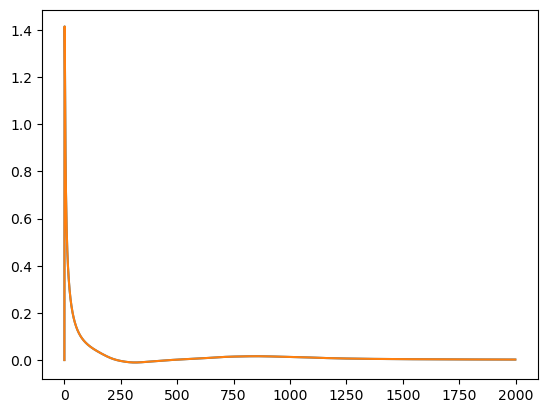

In [56]:
plt.plot(mean_dict_loaded["0"]["reward"][0])
plt.plot(mean_dict_loaded["0"]["reward"][-1])

In [57]:
base_path = "../pareto/tmp/"
 
loaded_dict = np.load(base_path+"mean_dict.npz")
mean_dict_loaded = {key: loaded_dict[key] for key in loaded_dict}
len(mean_dict_loaded["0"])
mean_rewards =mean_dict_loaded["0"]


FileNotFoundError: [Errno 2] No such file or directory: '../pareto/tmp/mean_dict.npz'

In [29]:


# Define color fader function for gradient color
def colorFader(c1, c2, mix=0):
    """ Linear interpolation between two colors `c1` and `c2` """
    return tuple(c1[i] * (1 - mix) + c2[i] * mix for i in range(3))



In [2]:

def plot_mean_rewards(mean_rewards, env, color_start=(0.7, 0.7, 0.9), color_end=(0.1, 0.1, 0.6)):
    """
    Plot mean rewards over steps across episodes with a gradient color scheme.
    
    Parameters:
    - mean_rewards: 2D array (episodes x steps) of mean rewards to plot.
    - env: environment identifier to include in the plot title.
    - color_start: RGB tuple for the start of the gradient color.
    - color_end: RGB tuple for the end of the gradient color.
    """
    n = mean_rewards.shape[0]  # Number of episodes
    
    # Plot each episode with a gradient of colors from light blue to dark blue
    for i in range(n):
        color = colorFader(color_start, color_end, i / n)
        plt.plot(mean_rewards[i], color=color, alpha=0.7)
    
    # Labeling the plot
    plt.xlabel('Steps')
    plt.ylabel('Mean Reward')
    plt.title('Mean Reward over Steps across Episodes for env ' + str(env))
    plt.show()

# Example usage:
# Define sample mean_rewards data for testing
mean_rewards = mean_dict_loaded["0"]["reward"]
env = "Env0"

# Call the function to plot mean rewards
plot_mean_rewards(mean_rewards, env)

NameError: name 'mean_dict_loaded' is not defined

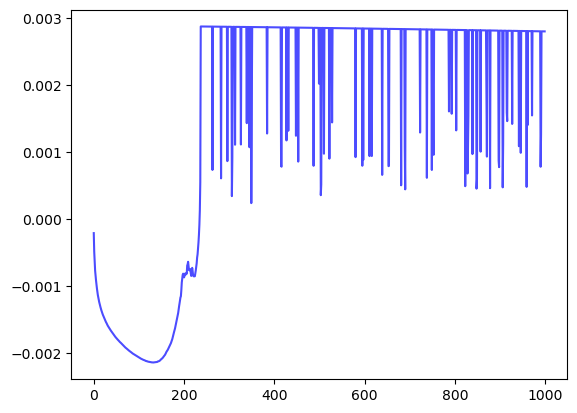

In [12]:
plt.plot(mean_rewards[-1], color="b", alpha=0.7)

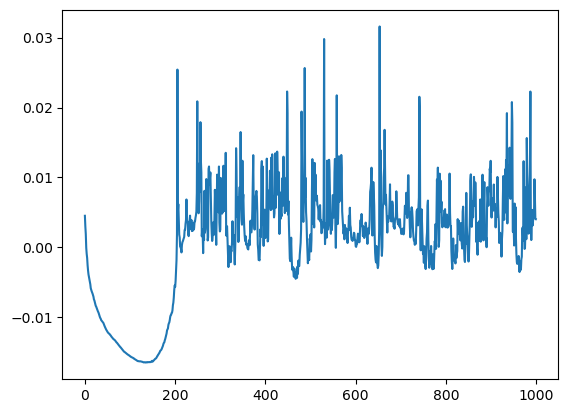

In [6]:
plt.plot(mean_dict_loaded["0"][4])

In [7]:
# base_path = "../pareto/av_1_c_250/"
# data = pd.read_csv(base_path+"veh_2/train_results.csv")
# plt.plot(data["reward_mean"])
# plt.plot(data["speed"])
# plt.plot(data["speed_human"])
# plt.plot(data["speed_rl"])

In [91]:
veh_num_array

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

In [51]:
# Load data for vehicle flows
base_path =  "../pareto/av_0_c_200/"

veh_num_array = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
veh_data = {veh_num: np.load(base_path+f"veh_{veh_num}/flow_eps.npy") for veh_num in veh_num_array}
mean_speed_data = {veh_num: np.load(base_path+f"veh_{veh_num}/mean_speed_eps.npy") for veh_num in veh_num_array}

veh_data[veh_num_array[0]].shape

veh_colors = ((0.1, 0.1, 0.6), (0.7, 0.7, 0.9))

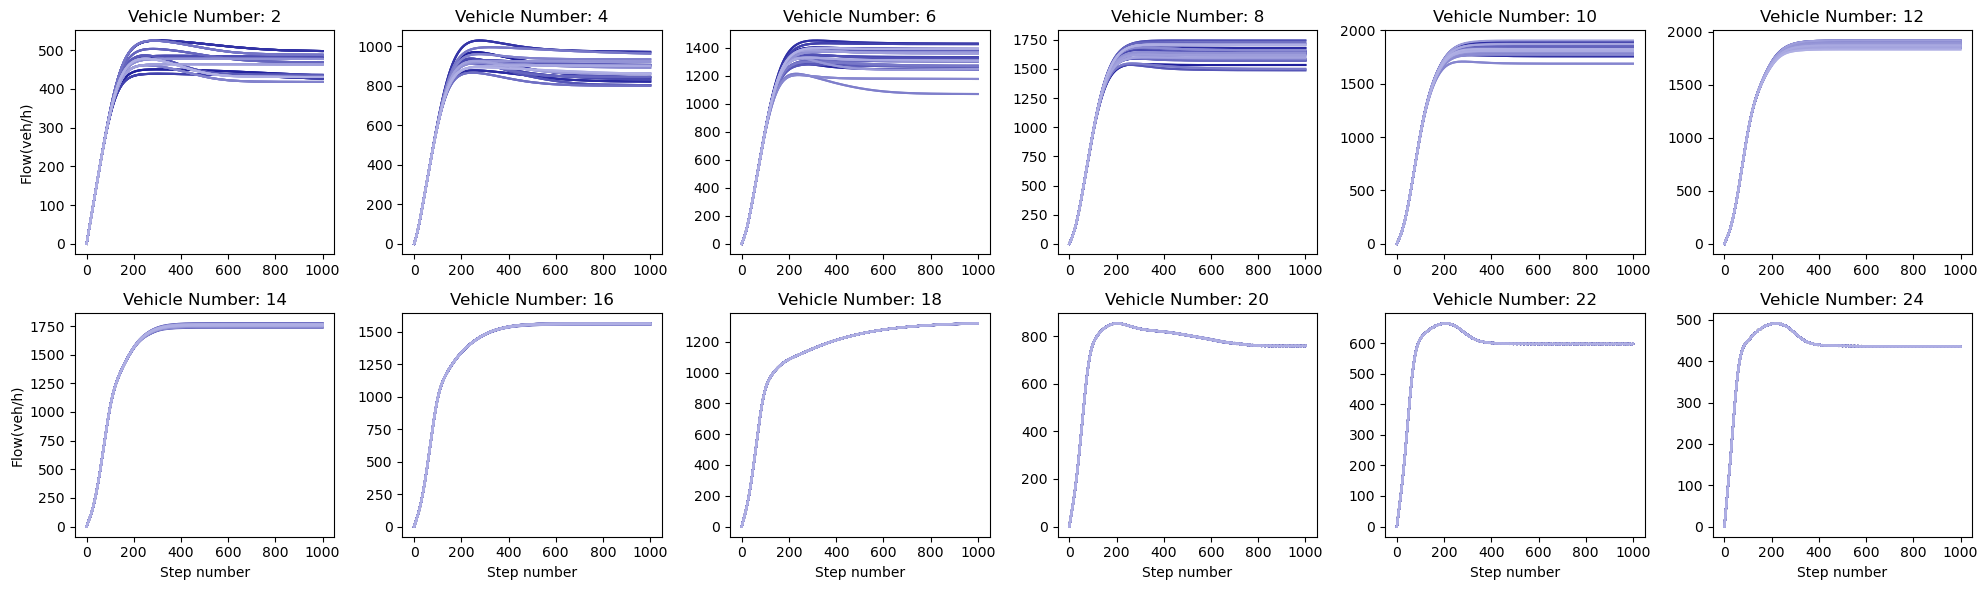

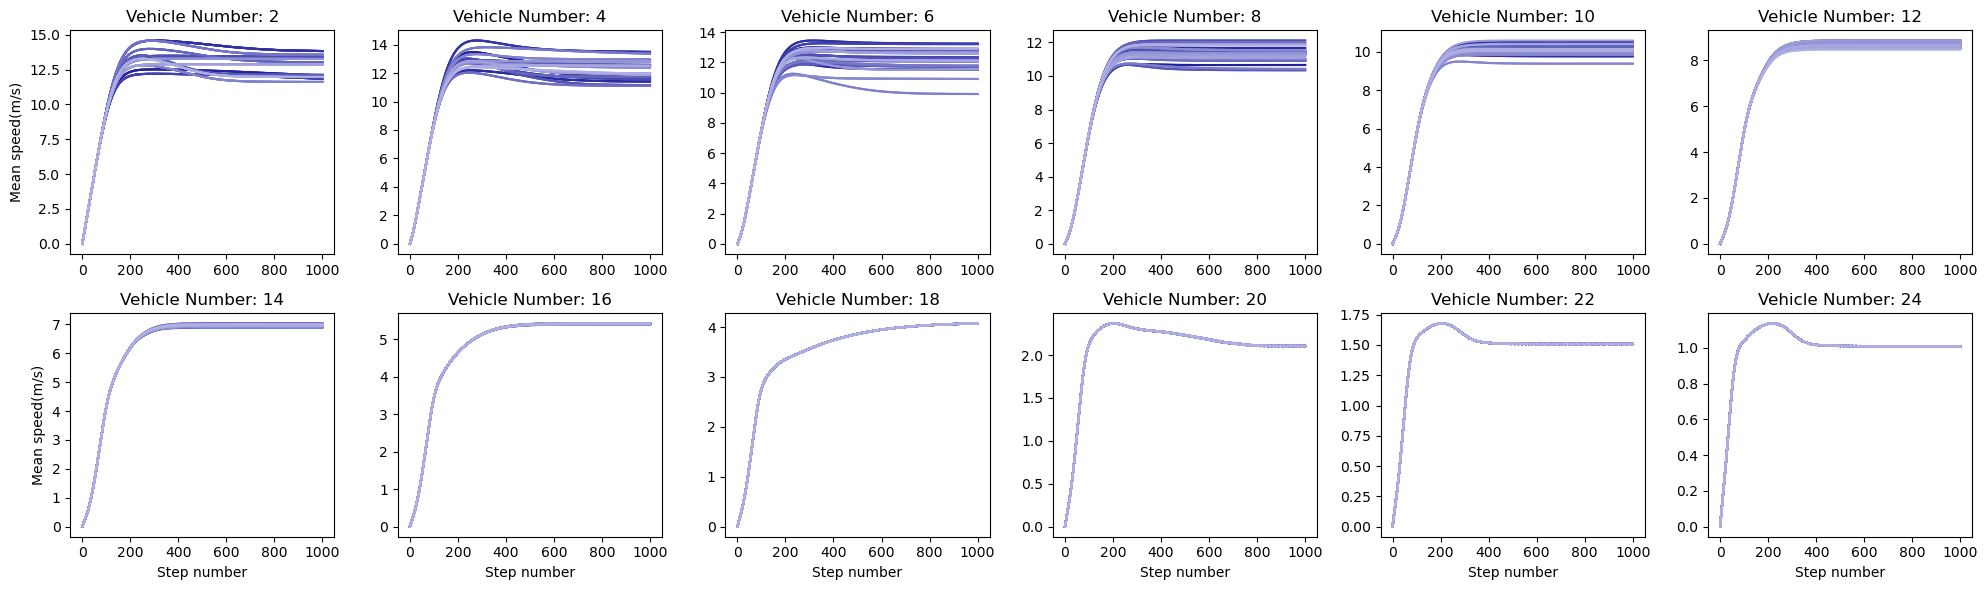

In [52]:

def plot_vehicle_data(veh_num_array, veh_data, veh_colors, y_label):
    """
    Plot data for different vehicle number experiments in a grid of subplots.
    
    Parameters:
    - veh_num_array: list of vehicle numbers for each experiment.
    - veh_data: dictionary where keys are vehicle numbers, and values are 2D arrays (evaluation times x steps).
    - veh_colors: tuple of two RGB color tuples for gradient (start and end colors).
    - y_label: string label for the y-axis.
    """
    # Define color range
    color_start, color_end = veh_colors
    
    # Calculate the number of subplots needed
    num_experiments = len(veh_num_array)
    num_cols = 6
    num_rows = (num_experiments + num_cols - 1) // num_cols  # to get enough rows
    
    # Set up the figure and axes
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 3))
    axs = axs.flatten()
    
    # Loop through each experiment and plot the data
    for idx, veh_num in enumerate(veh_num_array):
        data = veh_data[veh_num]
        n = data.shape[0]  # number of evaluation times
        x = np.arange(data.shape[1])  # x-axis values for each step number
        
        ax = axs[idx]
        for i in range(n):
            color = colorFader(color_start, color_end, i / n)
            ax.plot(x, data[i, :], color=color, label=f"veh num: {veh_num}" if i == 0 else "")
        
        ax.set_title(f"Vehicle Number: {veh_num}")
        if idx % num_cols == 0:
            ax.set_ylabel(y_label)
        if idx >= (num_rows - 1) * num_cols:
            ax.set_xlabel("Step number")
    
    # Hide any unused subplots
    for j in range(idx + 1, len(axs)):
        axs[j].axis("off")
    
    plt.tight_layout()
    plt.show()



# Call the function to plot data
plot_vehicle_data(veh_num_array, veh_data, veh_colors, "Flow(veh/h)")
plot_vehicle_data(veh_num_array, mean_speed_data, veh_colors, "Mean speed(m/s)")


In [53]:
# Define color fading function
def colorFader(c1, c2, mix=0):
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1 - mix) * c1 + mix * c2)

def generate_vehicle_color_pairs(num_range):
    # Predefined color pairs (light to dark shades)
    # Provided color pairs
    color_pairs = [
        ('#FFEBEE', '#B71C1C'),   # very light red to darker red
        ('#FFF9C4', '#A18800'),   # very light yellow to darker yellow
        ('#F48FB1', '#880E4F'),   # very light magenta to darker magenta
        ('#C8E6C9', '#0A3D00'),   # very light green to darker green
        ('#FFE0B2', '#E65100'),   # very light peach to darker orange
        ('#E3F2FD', '#002171'),   # very light blue to darker blue
        ('#B2DFDB', '#004D40'),   # very light teal to darker teal
        ('#FFCCBC', '#8E0000'),   # very light orange to darker orange
        ('#D1C4E9', '#311B92'),   # very light lavender to darker indigo
        ('#F8BBD0', '#560027'),   # very light pink to darker pink
        ('#FFF3E0', '#E65100'),   # very light mango to darker mango
        ('#E1BEE7', '#2C003E'),   # very light purple to darker purple
        ('#DCEDC8', '#33691E'),   # very light mint to darker green
        ('#FFECB3', '#C56000'),   # very light amber to darker amber
        ('#CFD8DC', '#263238'),   # very light slate to darker slate
        ('#EFEBE9', '#1B0000'),   # very light brown to darker brown
        ('#F8BBD0', '#880E4F'),   # very light rose to darker rose
        ('#E0F7FA', '#00363A'),   # very light cyan to darker cyan
        ('#B3E5FC', '#01579B'),   # very light sky blue to darker sky blue
        ('#ECEFF1', '#000A12'),   # very light blue-grey to darker blue-grey
        ('#F4FF81', '#827717'),   # very light chartreuse to darker greenish yellow
        ('#F1F8E9', '#1B5E20'),   # very light green to darker green
        ('#B2EBF2', '#006064'),   # very light turquoise to darker turquoise
        ('#FFEBEE', '#B71C1C'),   # very light red to darker red (repeated)
        ('#FFF9C4', '#A18800'),   # very light yellow to darker yellow (repeated)
        ('#F48FB1', '#880E4F'),   # very light magenta to darker magenta (repeated)
        ('#C8E6C9', '#0A3D00'),   # very light green to darker green (repeated)
        ('#FFE0B2', '#E65100'),   # very light peach to darker orange (repeated)
        ('#E3F2FD', '#002171'),   # very light blue to darker blue (repeated)
    ]

    # Ensure the number range is within the color palette size
    max_colors = len(color_pairs)
    if len(num_range) > max_colors:
        raise ValueError(f"Range too large. Max supported range size is {max_colors}.")

    # Create the vehicle color dictionary
    vehicle_colors = {}
    for i, num in enumerate(num_range):
        vehicle_colors[num] = color_pairs[i]
    
    return vehicle_colors




In [54]:
# Function to plot vehicle data
def plot_vehicle_data(veh_num_array, veh_data, veh_colors):
    fig, ax = plt.subplots(figsize=(8, 6))
    for veh_num in veh_num_array:
        data = veh_data[veh_num]
        n = data.shape[0]  # number of evaluation times
        x = range(data.shape[1])
        c1, c2 = veh_colors[veh_num]
        # Plotting each episode for the current vehicle number
        for i in range(n):
            plt.plot(x, data[i, :], color=colorFader(c1, c2, i / n))
        plt.plot(x, data[-1, :], label=f"veh num: {veh_num}")

    plt.ylabel("Flow", fontsize=10)
    plt.xlabel("Step number", fontsize=10)
    plt.title("The darker color represents later episodes, the lighter color represents earlier episodes")
    plt.legend()
    plt.show()



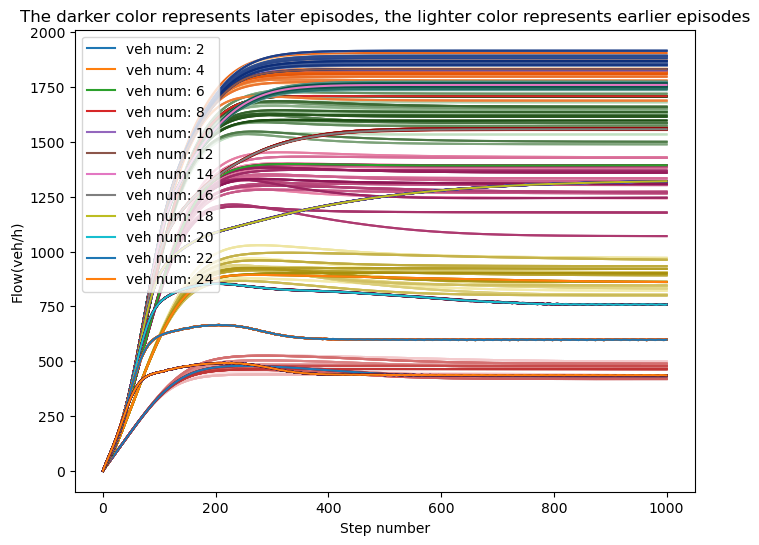

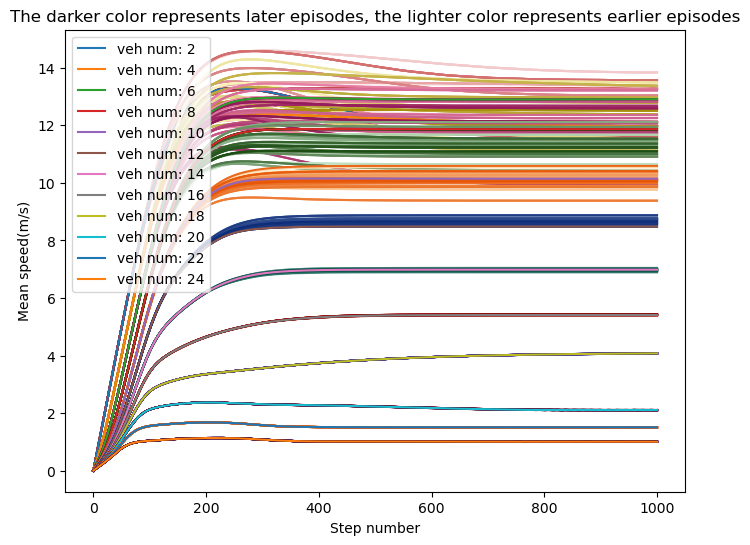

In [55]:

# Function to plot vehicle data
def plot_vehicle_data(veh_num_array, veh_data, veh_colors, label):
    fig, ax = plt.subplots(figsize=(8, 6))
    for veh_num in veh_num_array:
        data = veh_data[veh_num]
        n = data.shape[0]  # number of evaluation times
        x = range(data.shape[1])
        c1, c2 = veh_colors[veh_num]
        # Plotting each episode for the current vehicle number
        for i in range(n):
            plt.plot(x, data[i, :], color=colorFader(c1, c2, i / n))
        plt.plot(x, data[-1, :], label=f"veh num: {veh_num}")

    plt.ylabel(label, fontsize=10)
    plt.xlabel("Step number", fontsize=10)
    plt.title("The darker color represents later episodes, the lighter color represents earlier episodes")
    plt.legend()
    plt.show()
    
veh_colors = generate_vehicle_color_pairs(veh_num_array)

# Call the function to plot data
plot_vehicle_data(veh_num_array, veh_data, veh_colors, "Flow(veh/h)")
plot_vehicle_data(veh_num_array, mean_speed_data, veh_colors, label="Mean speed(m/s)")



In [56]:
veh_num_array = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

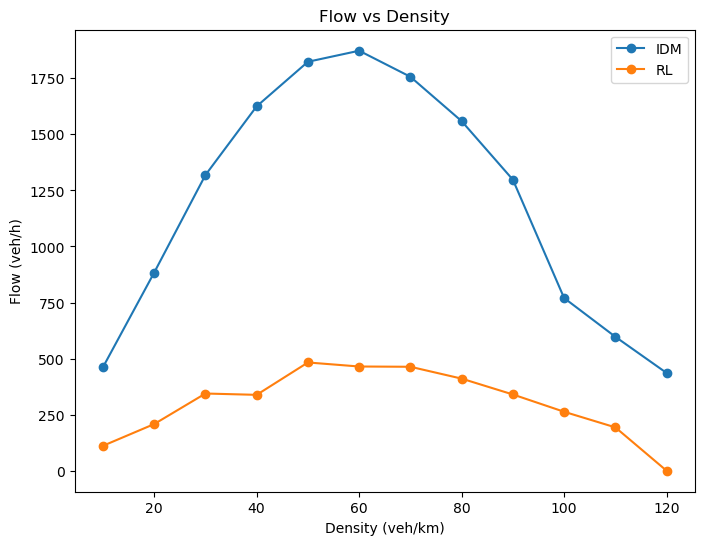

In [61]:
# Plotting Flow vs Density
fig, ax = plt.subplots(figsize=(8, 6))
density = np.array(veh_num_array) / (200 * 1e-3)
flow = np.array([np.mean(veh_data[veh_num][:, -500:]) for veh_num in veh_num_array])

plt.plot(density, flow, marker='o', label="IDM")
plt.plot(density_0, flow_0, marker='o', label="RL beta = 0")

# plt.plot(density_1, flow_1, marker='o', label="RL_100_steps")
plt.ylabel("Flow (veh/h)", fontsize=10)
plt.xlabel("Density (veh/km)", fontsize=10)
plt.title("Flow vs Density")
plt.legend(loc="upper right")
plt.show()


In [58]:
import pandas as pd
import numpy as np
data = {
    "Run": [
        "beta_0/veh_10", "beta_0/veh_12", "beta_0/veh_14",
        "beta_0/veh_16", "beta_0/veh_18", "beta_0/veh_2",
        "beta_0/veh_20", "beta_0/veh_22", "beta_0/veh_24",
        "beta_0/veh_4", "beta_0/veh_6", "beta_0/veh_8"
    ],
    "Value": [
        9.6554, 7.7463, 6.6226, 5.1339, 3.7786, 11.1115,
        2.629, 1.7577, 0.0001, 10.4037, 11.4769, 8.4598
    ],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Extract veh_number from Run and add it as a new column
df['veh_number'] = df['Run'].str.extract(r"veh_(\d+)").astype(int)

# Sort the DataFrame by veh_number
df_sorted = df.sort_values(by='veh_number')
df_sorted

,Run,Value,veh_number
5,beta_0/veh_2,11.1115,2
9,beta_0/veh_4,10.4037,4
10,beta_0/veh_6,11.4769,6
11,beta_0/veh_8,8.4598,8
0,beta_0/veh_10,9.6554,10
1,beta_0/veh_12,7.7463,12
2,beta_0/veh_14,6.6226,14
3,beta_0/veh_16,5.1339,16
4,beta_0/veh_18,3.7786,18
6,beta_0/veh_20,2.6290,20


In [59]:
df_sorted["Value"].to_list()

[11.1115,
 10.4037,
 11.4769,
 8.4598,
 9.6554,
 7.7463,
 6.6226,
 5.1339,
 3.7786,
 2.629,
 1.7577,
 0.0001]

In [62]:
flow_0 = np.array(density * np.array(df_sorted["Value"].to_list()))
flow_0

array([1.11115e+02, 2.08074e+02, 3.44307e+02, 3.38392e+02, 4.82770e+02,
       4.64778e+02, 4.63582e+02, 4.10712e+02, 3.40074e+02, 2.62900e+02,
       1.93347e+02, 1.20000e-02])

In [ ]:
flow = 